In [5]:
from BspFit import BspFit
from scipy.interpolate import BSpline 
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [13]:
with open('dets.pkl', 'rb') as f:
    dets = pickle.load(f)

#print(dets)
#print(len(dets))
#print(dets[0])

bf = BspFit(dets)
Alpha = [0, 0.001, 0.0001, 0.00001, 0.000001] 
Tck = [bf.solve(alpha) for alpha in Alpha]

[[500.19058228 202.69244385 547.29504395 307.82406616]
 [497.3197937  203.25669861 544.53234863 308.25045776]
 [494.40979004 204.3311615  541.6473999  307.98898315]
 ...
 [496.68374634 226.01245117 585.15960693 402.15942383]
 [499.28268433 224.93746948 587.10241699 402.2706604 ]
 [502.20443726 224.36799622 588.86328125 402.76553345]]
338
[500.19058228 202.69244385 547.29504395 307.82406616]


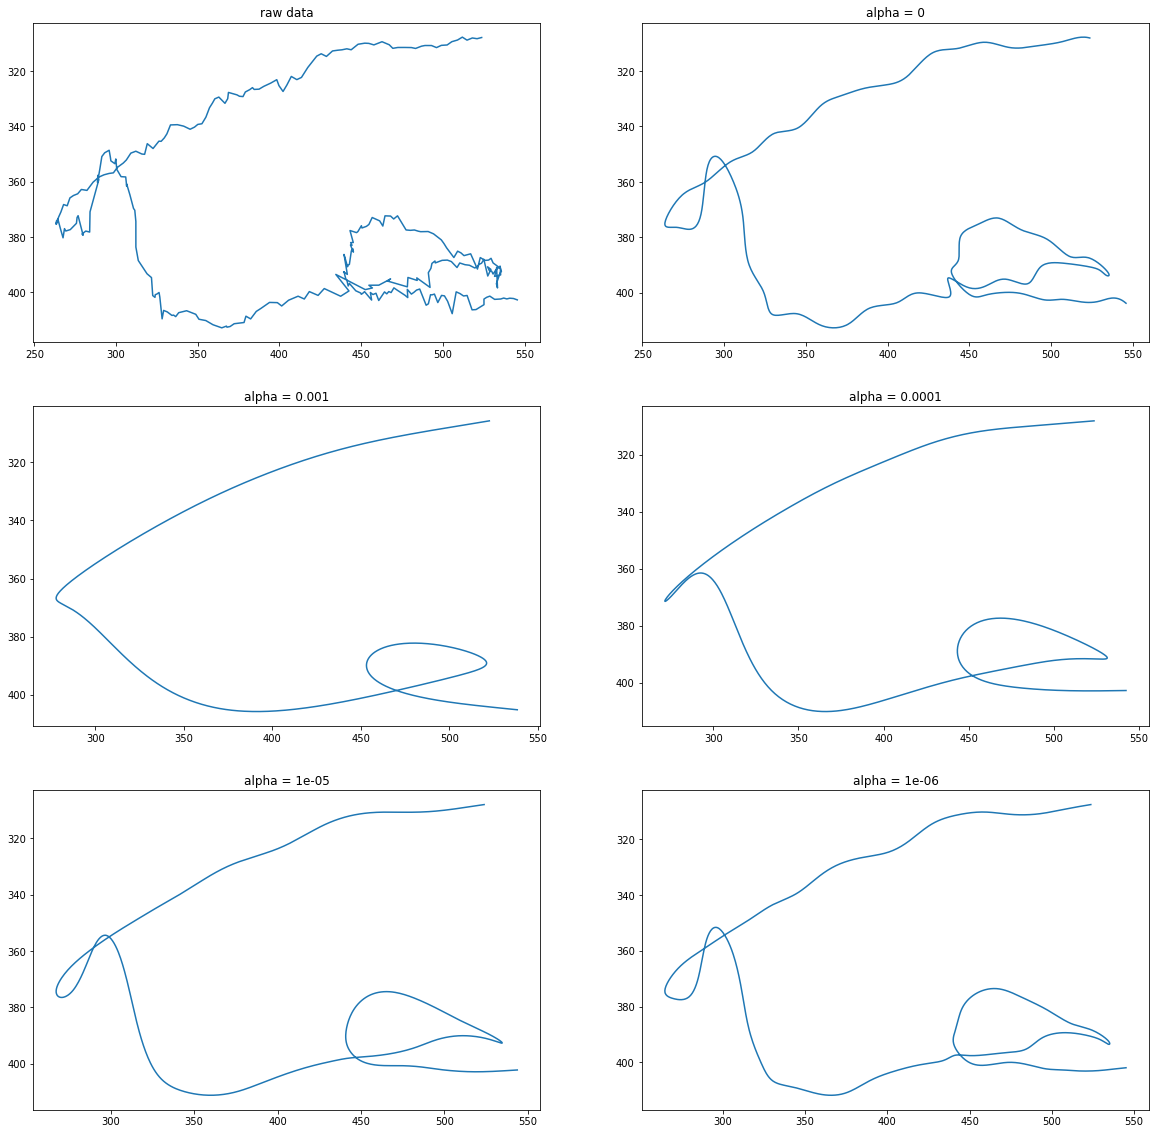

In [10]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(321)
ax.invert_yaxis() 
ax.plot(np.array(bf._P)[:,0],np.array(bf._P)[:,1]) 
ax.set_title('raw data')
xx = np.linspace(0,1,1000)
for i in range(len(Alpha)):
    ax = fig.add_subplot(322 + i)
    spl = BSpline(*Tck[i]) 
    ax.plot(spl(xx)[:,0],spl(xx)[:,1]) 
    ax.invert_yaxis() 
    ax.set_title('alpha = %g'%(Alpha[i]))
plt.show()